This is my first attempt on Kaggle so I decided to try using the sklearn framework that I am most comfortable with right now. So far, I am able to get the accuracy to about 86.73%.

In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Input data files are available in the "../input" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output."

# set pandas chained_assignment flag = None here
pd.options.mode.chained_assignment = None

adult.csv



In [2]:
def preprocess_target(dframe, df_column_name):
    col = dframe[[df_column_name]]
    le_col = LabelEncoder()
    le_col.fit(np.ravel(col))
    return le_col.transform(np.ravel(col))

def preprocess_features(dframe):
    for column in dframe:
        enc = LabelEncoder()
        if(column not in ['age','education.num','fnlwgt','capital.gain','capital.loss','hours.per.week']):
            dframe[column] = enc.fit_transform(dframe[column])
    return dframe

In [3]:
# import data and preprocess
df = pd.read_csv('../input/adult.csv')

# select and preprocess features
le_data = LabelEncoder()
features = ['age','workclass','education','marital.status','occupation','education.num','race','sex','relationship','capital.gain','capital.loss','native.country','income']
data = df[features]
data = preprocess_features(data)

# select target
target = data['income']
data = data.drop('income', axis=1)

In [4]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.4, random_state=0)

In [5]:
# select algorithm
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=1.0,max_depth=2, random_state=0)

In [6]:
# fit and predict
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

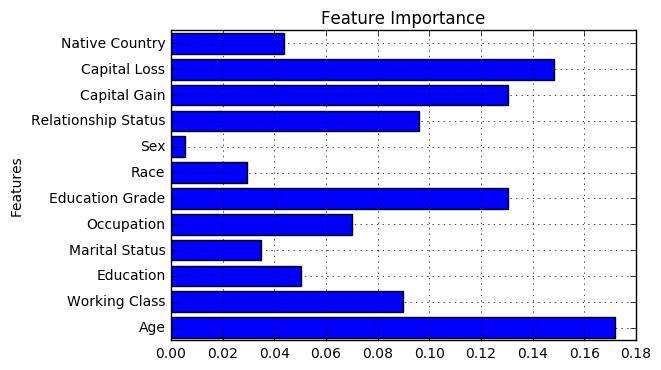

In [7]:
# display the relative importance of each attribute
relval = clf.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(12) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ('Age','Working Class','Education','Marital Status','Occupation','Education Grade','Race','Sex','Relationship Status','Capital Gain','Capital Loss','Native Country'))
plt.grid(True)

In [8]:
# calc metrics
true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == 0 and truth == 0:
        true_negatives += 1
    elif prediction == 0 and truth == 1:
        false_negatives += 1
    elif prediction == 1 and truth == 0:
        false_positives += 1
    elif prediction == 1 and truth == 1:
        true_positives += 1
    else:
        print ("Warning: Found a predicted label not == 0 or 1.")
        print ("All predictions should take value 0 or 1.")
        print ("Evaluating performance for processed predictions:")
        break

In [9]:
try:
    print("Test Dataset (40%):")
    print("true_positives",true_positives)
    print("true_negatives",true_negatives)
    print("false_positives",false_positives)
    print("false_negatives",false_negatives)
    total_predictions = true_negatives + false_negatives + false_positives + true_positives
    print("total predictions:",total_predictions)
    accuracy = 1.0*(true_positives + true_negatives)/total_predictions
    print("accuracy:",accuracy)
    precision = 1.0*true_positives/(true_positives+false_positives)
    print("precision:",precision)
    recall = 1.0*true_positives/(true_positives+false_negatives)
    print("recall",recall)
    f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
    print("f1",f1)
    f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
    print("f2",f2)
    print (clf)
    #print (PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5))
    #print (RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives))
    print ("")
except:
    print ("Got a divide by zero when trying out:", clf)
    print ("Precision or recall may be undefined due to a lack of true positive predicitons.")

Test Dataset (40%):
true_positives 2000
true_negatives 9296
false_positives 584
false_negatives 1145
total predictions: 13025
accuracy: 0.8672552783109405
precision: 0.7739938080495357
recall 0.6359300476947536
f1 0.6982021295164951
f2 0.6594566077552098
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

